### Imports

In [282]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Data preprocessing

In [217]:
sentences = []

with open("Harry_Potter_e_A_Pedra_Filosofal.txt", encoding = "utf-8") as f:
    for line in f:
        tokens = list(gensim.utils.tokenize(line, lower=True))
        sentences.append(tokens)

In [218]:
with open("Harry_Potter_Camara_Secreta-br.txt", encoding = "utf-8") as f:
    for line in f:
        tokens = list(gensim.utils.tokenize(line, lower=True))
        sentences.append(tokens)

In [219]:
print(sentences[:5])  # Print the first 5 sentences to check the tokenization

[['capítulo', 'um'], ['o', 'menino', 'que', 'sobreviveu'], [], ['o', 'sr', 'e', 'a', 'sra', 'dursley', 'da', 'rua', 'dos', 'alfeneiros', 'no', 'se', 'orgulhavam', 'de', 'dizer', 'que', 'eram'], ['perfeitamente', 'normais', 'muito', 'bem', 'obrigado', 'eram', 'as', 'últimas', 'pessoas', 'no', 'mundo', 'que', 'se']]


### Training a model

In [220]:
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, epochs=20, workers=3)

In [221]:
# Vetor da palavra 'harry'
model.wv['harry']

array([ 0.18716675,  0.29266676, -0.6597186 , -0.01551089, -0.278729  ,
       -0.278225  , -0.01317296,  0.97847205, -0.26958102,  0.8189682 ,
       -0.4970539 , -0.4538315 , -0.5396145 ,  0.543332  , -0.16523881,
       -0.41337982, -0.03903463,  0.07742538, -0.01250419, -0.33852655,
        0.5112069 ,  0.21875189, -0.3885202 , -0.01621524, -0.7397829 ,
        0.3184133 , -0.16135207,  0.5064817 , -0.6069716 , -1.2719042 ,
        0.11013614, -0.0897619 ,  0.07445111,  0.5511132 , -0.10964874,
        0.7667759 ,  0.655365  , -0.4945467 , -0.6680619 ,  0.19083293,
       -0.06605723, -0.17242238,  0.43110624,  0.15972306,  0.45986795,
        0.61782295, -0.58703893,  0.2594588 , -0.1722494 , -1.2184317 ,
       -0.13835685, -0.04173329,  0.40843496,  0.4497998 , -0.28262296,
        0.5399984 ,  0.5531156 ,  0.04312615,  1.1191894 ,  0.24891053,
        0.08201338, -0.5502202 , -0.19247109,  0.04537137,  0.02996547,
        0.12153974,  0.08555561,  0.09907036, -0.12623556,  0.32

In [222]:
# Vetor da palavra 'magia'
model.wv['magia']

array([-0.4058392 ,  0.7620957 , -0.14096294, -0.29766104,  0.09990605,
        0.27064782, -0.09949248,  0.07917591, -0.1673717 , -0.412224  ,
       -0.4707236 ,  0.29875767,  0.56480795, -0.19327018, -0.44166452,
       -0.43093464,  0.32874435, -0.25194553, -0.1851158 , -0.22730528,
       -0.36577588, -0.12918015,  0.31874192,  0.33266914,  0.5576058 ,
       -0.09959897, -0.27481237, -0.19711123,  0.18938392, -0.46550485,
        0.00624225,  0.3265455 , -0.20866331, -0.1781993 , -0.02139309,
       -0.10978881,  0.03599116, -0.34105352, -0.26036003, -0.31191236,
       -0.4962215 ,  0.6153778 , -0.19685659, -1.0707074 , -0.07900291,
        0.02227424,  0.47792497,  0.18545453, -0.50829303,  0.68634224,
        0.19161978,  0.18583883, -0.40818632,  0.46112952, -0.12566523,
        0.16271327, -0.35988536,  0.32607397, -0.27993378,  0.09199502,
       -0.04829163,  0.15654746,  0.30772   ,  0.26239046,  0.12982698,
       -0.25507677,  0.7663086 , -0.09937347, -0.5359556 , -0.09

In [223]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")

In [224]:
get_word("Advanced")

The word 'Advanced' does not appear in this model


In [225]:
get_word("harry")

array([ 0.18716675,  0.29266676, -0.6597186 , -0.01551089, -0.278729  ,
       -0.278225  , -0.01317296,  0.97847205, -0.26958102,  0.8189682 ,
       -0.4970539 , -0.4538315 , -0.5396145 ,  0.543332  , -0.16523881,
       -0.41337982, -0.03903463,  0.07742538, -0.01250419, -0.33852655,
        0.5112069 ,  0.21875189, -0.3885202 , -0.01621524, -0.7397829 ,
        0.3184133 , -0.16135207,  0.5064817 , -0.6069716 , -1.2719042 ,
        0.11013614, -0.0897619 ,  0.07445111,  0.5511132 , -0.10964874,
        0.7667759 ,  0.655365  , -0.4945467 , -0.6680619 ,  0.19083293,
       -0.06605723, -0.17242238,  0.43110624,  0.15972306,  0.45986795,
        0.61782295, -0.58703893,  0.2594588 , -0.1722494 , -1.2184317 ,
       -0.13835685, -0.04173329,  0.40843496,  0.4497998 , -0.28262296,
        0.5399984 ,  0.5531156 ,  0.04312615,  1.1191894 ,  0.24891053,
        0.08201338, -0.5502202 , -0.19247109,  0.04537137,  0.02996547,
        0.12153974,  0.08555561,  0.09907036, -0.12623556,  0.32

### Vocabulary Length

In [226]:
len(model.wv)

12665

In [227]:
model.wv.index_to_key

['de',
 'que',
 'a',
 'o',
 'e',
 'harry',
 'se',
 'não',
 'para',
 'um',
 'uma',
 'os',
 'com',
 'do',
 'em',
 'ele',
 'da',
 'disse',
 'é',
 'no',
 'rony',
 'na',
 'você',
 'mas',
 'por',
 'as',
 'mais',
 'estava',
 'como',
 'quando',
 'eu',
 'era',
 'à',
 'ao',
 'muito',
 'foi',
 'hagrid',
 'está',
 'dos',
 'coisa',
 'me',
 'hermione',
 'sua',
 'seu',
 'eles',
 'ela',
 'bem',
 'das',
 'cabeça',
 'olhos',
 'isso',
 'ter',
 'até',
 'dumbledore',
 'tinha',
 'vez',
 'perguntou',
 'sem',
 'então',
 'vai',
 'ser',
 'lhe',
 'só',
 'porta',
 'agora',
 'lo',
 'snape',
 'já',
 'parecia',
 'pelo',
 'weasley',
 'dois',
 'fazer',
 'potter',
 'vocês',
 'nada',
 'voz',
 'lockhart',
 'depois',
 'dizer',
 'todos',
 'vamos',
 'nunca',
 'havia',
 'quem',
 'alguma',
 'seus',
 'aqui',
 'tão',
 'pela',
 'nem',
 'sr',
 'dele',
 'fora',
 'nos',
 'draco',
 'lado',
 'quase',
 'estavam',
 'sabe',
 'mesmo',
 'ainda',
 'sala',
 'tem',
 'ver',
 'tempo',
 'ah',
 'grifinória',
 'tinham',
 'porque',
 'casa',
 'meu'

### Similarity

In [277]:
model.wv.most_similar('harry')

[('neville', 0.73707515001297),
 ('mione', 0.7259889841079712),
 ('draco', 0.711408793926239),
 ('ele', 0.710253119468689),
 ('hermione', 0.7072654366493225),
 ('hagrid', 0.6985958814620972),
 ('quirrell', 0.6771265864372253),
 ('rony', 0.6661238074302673),
 ('velhinho', 0.649145245552063),
 ('ela', 0.6454833745956421)]

In [278]:
model.wv.most_similar('ron')

[('latão', 0.9600421190261841),
 ('curvas', 0.9591366052627563),
 ('goshawk', 0.950446367263794),
 ('meios', 0.9502414464950562),
 ('jardineiro', 0.9500834345817566),
 ('carrinhos', 0.9465486407279968),
 ('lisa', 0.9451934695243835),
 ('corrediços', 0.9444833993911743),
 ('removedor', 0.942821741104126),
 ('reunirem', 0.9416123628616333)]

In [ ]:
model.wv.most_similar('grifinória')

[('sonserina', 0.8962118625640869),
 ('lufa', 0.8345415592193604),
 ('corvinal', 0.8318049311637878),
 ('torre', 0.8310011029243469),
 ('escola', 0.8245235681533813),
 ('biblioteca', 0.8236294388771057),
 ('garantindo', 0.8177842497825623),
 ('existência', 0.8078579902648926),
 ('magia', 0.7900086641311646),
 ('troféus', 0.7894880175590515)]

In [ ]:
model.wv.most_similar('voldemort')

[('autor', 0.9153478145599365),
 ('flamel', 0.9120178818702698),
 ('atacante', 0.9112467765808105),
 ('explicar', 0.9058405160903931),
 ('comigo', 0.9052547216415405),
 ('garotinho', 0.9037669897079468),
 ('provavelmente', 0.9020825028419495),
 ('nasceu', 0.9017844796180725),
 ('enfrentar', 0.9012502431869507),
 ('decidir', 0.9002344608306885)]

In [ ]:
model.wv.most_similar('magia')

[('sonserina', 0.8795905113220215),
 ('hébridas', 0.8779504895210266),
 ('usar', 0.8704788088798523),
 ('escola', 0.866347074508667),
 ('existência', 0.859411358833313),
 ('seção', 0.8532114028930664),
 ('ministro', 0.8515319228172302),
 ('matéria', 0.8448984026908875),
 ('festivo', 0.8385889530181885),
 ('garantindo', 0.8354076147079468)]

In [ ]:
model.wv.most_similar('feitiço')

[('lançar', 0.9398152828216553),
 ('jeito', 0.9166167974472046),
 ('dragão', 0.9122725129127502),
 ('amor', 0.9122022986412048),
 ('presente', 0.9078601002693176),
 ('visgo', 0.8995424509048462),
 ('monstro', 0.8982829451560974),
 ('livro', 0.8953185081481934),
 ('concentravam', 0.8935307860374451),
 ('perfeito', 0.8926610350608826)]

In [279]:
model.wv.most_similar('hogwarts')

[('dinheiro', 0.8246355056762695),
 ('chinelos', 0.8146181702613831),
 ('eton', 0.8142951130867004),
 ('meter', 0.8101898431777954),
 ('transformar', 0.8010823726654053),
 ('servi', 0.8003573417663574),
 ('demitido', 0.7975174784660339),
 ('presenciado', 0.792007327079773),
 ('magia', 0.7893201112747192),
 ('casa', 0.7887239456176758)]

In [280]:
print(model.wv.similarity("harry", "ansioso"))
print(model.wv.similarity("bruxaria", "magia"))
print(model.wv.similarity("dumbledore", "voldemort"))

0.638782
0.7601093
0.4851352


In [ ]:
pairs = [
    ('harry', 'ron'),
    ('diabo', 'feitiço'),
    ('harry', 'grifinória'),
    ('hogwarts', 'bruxaria'),
    ('hogwarts', 'orfanato')
]

for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model.wv.similarity(w1, w2)))

harry 	 ron 	 0.38
diabo 	 feitiço 	 0.85
harry 	 grifinória 	 0.13
hogwarts 	 bruxaria 	 0.59
hogwarts 	 orfanato 	 0.63


### Intruso - Which one is the odd one out in this list?

In [ ]:
model.wv.doesnt_match(["hermione", "harry", "bruxaria"]) # Hermione e Harry são personagens. "Bruxaria" é um conceito mágico.

'bruxaria'

In [ ]:
model.wv.doesnt_match(["varinha", "capa", "harry"]) # Varinha e capa são objetos mágicos. Harry é uma pessoa.

'harry'

In [ ]:
model.wv.doesnt_match(["sonserina","voldemort","grifinória"]) # Voldemort é personagens. Grifinória e Sonserina são casas.

'voldemort'

### Analogies

In [ ]:
result = model.wv.most_similar(positive=["harry", "bem"], negative=["voldemort"])
print(result[0])

('hermione', 0.610047459602356)


In [ ]:
result = model.wv.most_similar(positive=["sonserina", "harry"], negative=["draco"])
print(result[0])

('grifinória', 0.7073195576667786)


In [ ]:
model.wv.most_similar("harry", topn=50)

[('neville', 0.73707515001297),
 ('mione', 0.7259889841079712),
 ('draco', 0.711408793926239),
 ('ele', 0.710253119468689),
 ('hermione', 0.7072654366493225),
 ('hagrid', 0.6985958814620972),
 ('quirrell', 0.6771265864372253),
 ('rony', 0.6661238074302673),
 ('velhinho', 0.649145245552063),
 ('ela', 0.6454833745956421),
 ('ansioso', 0.6387819647789001),
 ('controlar', 0.6364765167236328),
 ('colin', 0.6340300440788269),
 ('riddle', 0.6322742104530334),
 ('cocuruto', 0.6277385950088501),
 ('manhoso', 0.6217915415763855),
 ('repente', 0.6175085306167603),
 ('enjoar', 0.6161414980888367),
 ('percy', 0.6141915321350098),
 ('escapar', 0.6098011136054993),
 ('escapuliu', 0.609375536441803),
 ('então', 0.606476366519928),
 ('astucioso', 0.6021631360054016),
 ('gina', 0.6021183133125305),
 ('lentamente', 0.6015765070915222),
 ('nervoso', 0.6011917591094971),
 ('furioso', 0.5985659956932068),
 ('cortava', 0.5960625410079956),
 ('desesperado', 0.5932987332344055),
 ('interessado', 0.591067135334

In [ ]:
def analogy( x2, y1, x1):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [268]:
print(analogy('voldemort', 'dumbledore', 'harry')) 

vovó


In [269]:
analogy('magia', 'feitiço', 'varinha')

'herdeiro'

In [270]:
print(analogy('ron', 'hermione', 'harry')) 

feios


In [271]:
analogy('pedra', 'filosofal', 'capa')

'acontece'

### Save Model

In [ ]:
model.wv.save_word2vec_format('model_harry.txt', binary = False)

In [ ]:
# python -m gensim.scripts.word2vec2tensor -i model_harry.txt -o model_harry

# https://projector.tensorflow.org

### PCA Visualization

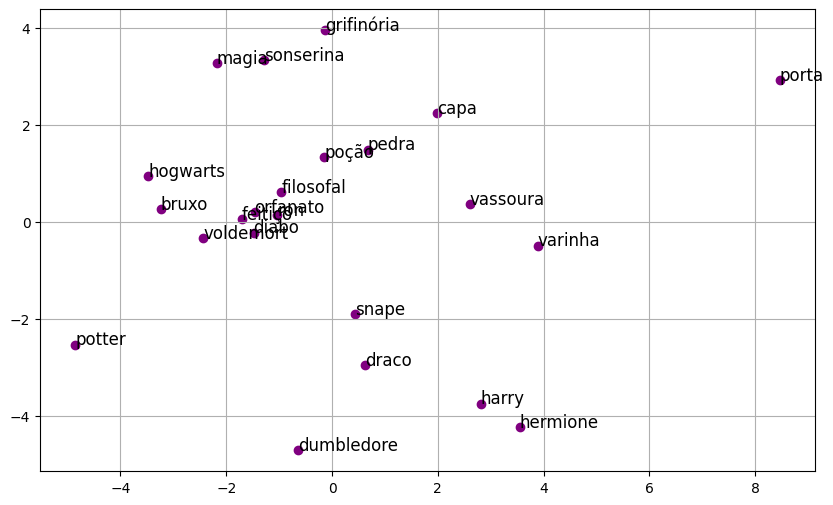

In [286]:
model = KeyedVectors.load_word2vec_format('model_harry.txt', binary=False) # carregar os vetores guardados

words = [
    'harry', 'ron', 'voldemort', 'hermione', 'dumbledore', 'potter', 'snape', 'draco',
    'poção', 'porta', 'capa', 'hogwarts', 'bruxo', 'varinha', 'feitiço', 'magia',
    'sonserina', 'grifinória', 'vassoura', 'diabo', 'pedra', 'filosofal', 'orfanato',
]
vetores = [model[word] for word in words]

# pca
pca = PCA(n_components=2)
vetores_2d = pca.fit_transform(vetores)

# gráfico
plt.figure(figsize=(10, 6))
plt.scatter(vetores_2d[:, 0], vetores_2d[:, 1], color='purple')

# Adicionar rótulos
for i, palavra in enumerate(words):
    plt.annotate(palavra, xy=(vetores_2d[i, 0], vetores_2d[i, 1]), fontsize=12)

plt.grid(True)
plt.show()

### TensorFlow Visualization

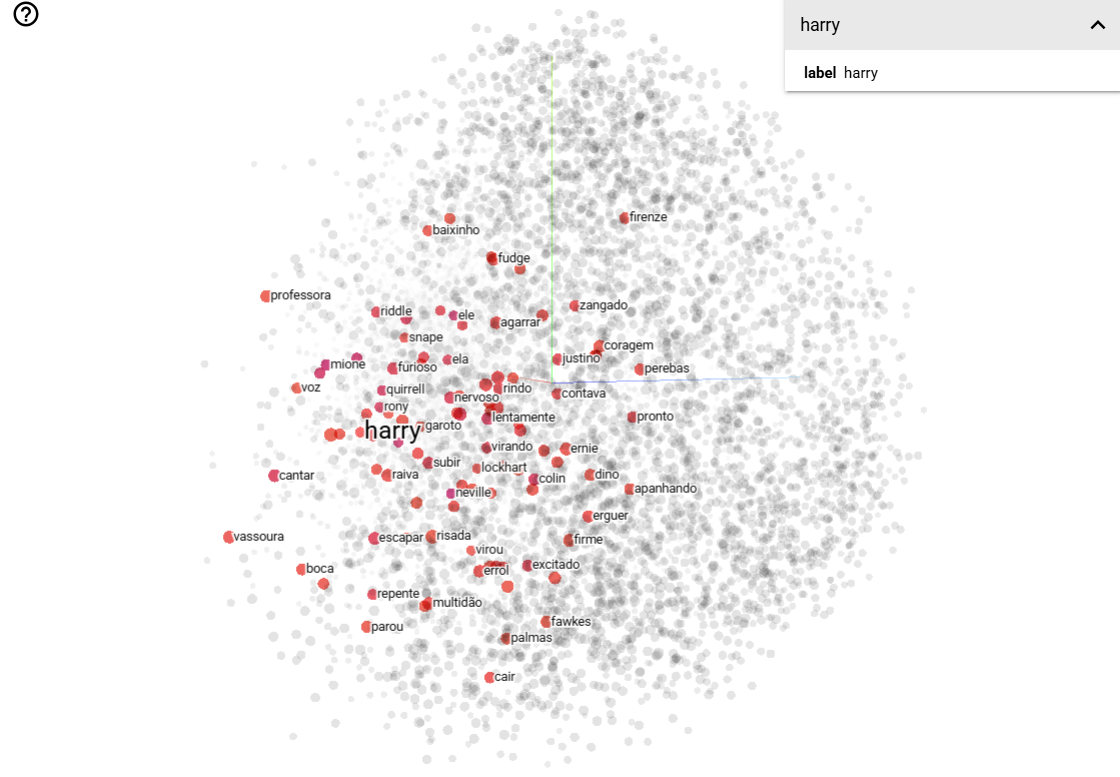